# Convolutional Networks + Dense applied in IWR using Spectrograms

    Author: Fernanda Ferreira
    Professor: Tiago F. Tavares
    
    date: 02/2019

## Import Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import glob
import librosa
import librosa.display as ld
# Printa todos os valores do array
#np.set_printoptions(threshold=np.inf)
np.set_printoptions(threshold=10)
import pandas as pd
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
import keras

/home/fernanda/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## To load audios

In [2]:
data_train = glob.glob('fernanda_audios_train/*.wav')
data_test = glob.glob('fernanda_audios_test/*.wav')

In [3]:
def load_datas(data):
    len_audios = []
    audios = []

    for file in sorted(data):
        audio, sr = librosa.core.load(file, sr=None, mono=True, offset=0.0, duration=None)
        len_audios.append(len(audio))
        audios.append(audio)
        max_audio = max(len_audios)
        
    return audios, len_audios, sr

In [4]:
audios_train, len_audios_train, sr = load_datas(data_train)
audios_test, len_audios_test, sr = load_datas(data_test)

In [5]:
def spectrograms(audios, len_audios, sr):
    
    hop_length = 400
    n_fft = 500

    #To convert the hop length and frame size to units of seconds:
    print ("hop length[s]:", float(hop_length)/sr) # units of seconds
    print ("frame size[s]:",float(n_fft)/sr) # units of seconds

    audios_resize = []
    specs = []

    for i in range(len(audios)):
        shape = (max(len_audios))
        i_audio = np.array(audios[i])
        i_audio.resize(shape)
        x = librosa.stft(i_audio, n_fft=n_fft, hop_length=hop_length)
        X = librosa.amplitude_to_db(np.abs(x), ref=np.max)
        specs.append(X)
        audios_resize.append(i_audio)
        
    return specs

#Librosa.stft return:
#np.ndarray [shape=(1 + n_fft/2, t), dtype=dtype]

In [6]:
specs_train = spectrograms(audios_train, len_audios_train, sr)
specs_test = spectrograms(audios_test, len_audios_train, sr)

hop length[s]: 0.009070294784580499
frame size[s]: 0.011337868480725623
hop length[s]: 0.009070294784580499
frame size[s]: 0.011337868480725623


In [7]:
specs_train = np.array(specs_train)
specs_test = np.array(specs_test)

## To load Labels

In [8]:
l_train = pd.read_csv('labels/labels_train.csv', sep=';')
l_test = pd.read_csv('labels/labels_test.csv', sep=';')
#l_train.head(5)
#file = open('datasets/fernando_falas/labels.txt', 'r')
#print (file.read())

l_col_train = l_train['label']
l_col_test = l_test['label']
l_col_train.head(5)

0    ACADEMIA
1    ACADEMIA
2    ACADEMIA
3    ACADEMIA
4    ACADEMIA
Name: label, dtype: object

## To separate 80% to train and 20% to test

In [9]:
#stratify: certifica a mesma quantidade de audios de cada classe.
x_train, x_val, y_train, y_val = train_test_split(specs_train, l_col_train, test_size=0.2, random_state=42, stratify=l_col_train)
#x_train, x_test, y_train, y_test = train_test_split(specs, l_academia, test_size=0.2, random_state=42, stratify=l_academia)

#print (type(x_train))

In [10]:
#y_train_count = count_elements(y_train_bi)
#print (y_train_count)
#y_test_count = count_elements(y_test_bi)
#print (y_test_count)

#print (type(y_train[0]))

#x_train_np = specs_train
x_test_np = specs_test

#y_train_np = np.array(l_col_train)
y_test_np = np.array(l_col_test)

#print (type(y_train))
y_train_np = np.array(y_train)
y_val_np = np.array(y_val)
x_train_np = np.array(x_train)
x_val_np = np.array(x_val)
#x_test_np = specs_test
#y_test_np = np.array(l_col_test)
#print (y_train_np)

## Transform labels in binary

In [11]:


# convert class vectors to binary class matrices
def string_to_binary(lista):
    
    for i in range(len(lista)):
        if lista[i] == 'ACADEMIA':
            lista[i] = 0
        elif lista[i] == 'AEROPORTO':
            lista[i] = 1
        elif lista[i] == 'CASA':
            lista[i] = 2
        elif lista[i] == 'CINEMA':
            lista[i] = 3
        elif lista[i] == 'ESCOLA':
            lista[i] = 4
        elif lista[i] == 'FACULDADE':
            lista[i] = 5
        elif lista[i] == 'FARMACIA':
            lista[i] = 6
        elif lista[i] == 'HOSPITAL':
            lista[i] = 7
        elif lista[i] == 'MERCADO':
            lista[i] = 8
        elif lista[i] == 'TRABALHO':
            lista[i] = 9
    return lista


In [12]:
y_train_bi = string_to_binary(y_train_np)
print (y_train_bi)

y_val_bi = string_to_binary(y_val_np)
print (y_val_bi)

y_test_bi = string_to_binary(y_test_np)
print (y_test_bi)

print (x_train_np.shape)

[1 7 1 ... 4 4 3]
[2 2 8 ... 6 9 8]
[0 0 0 ... 9 9 9]
(2560, 251, 192)


# Conv2D + Maxpooling + Dense building

In [13]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv1D
from keras import backend as K

# Versão2

In [14]:
print (x_train_np.shape)
print (x_val_np.shape)
print (x_test_np.shape)
print (y_train_np.shape)
print (y_val_np.shape)
print (y_test_np.shape)

(2560, 251, 192)
(640, 251, 192)
(800, 251, 192)
(2560,)
(640,)
(800,)


In [15]:
# input image dimensions
img_rows = x_train_np.shape[1]
img_cols = x_train_np.shape[2]

if K.image_data_format() == 'channels_first':
    x_train_np = x_train_np.reshape(x_train_np.shape[0], 1, img_rows, img_cols)
    x_val_np = x_val_np.reshape(x_val_np.shape[0], 1, img_rows, img_cols)
    x_test_np = x_test_np.reshape(x_test_np.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train_np = x_train_np.reshape(x_train_np.shape[0], img_rows, img_cols, 1)
    x_val_np = x_val_np.reshape(x_val_np.shape[0], img_rows, img_cols, 1)
    x_test_np = x_test_np.reshape(x_test_np.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train_np = x_train_np.astype('float32')
x_val_np = x_val_np.astype('float32')
x_test_np = x_test_np.astype('float32')
x_train_np /= 255
x_val_np /= 255
x_test_np /= 255
print('x_train shape:', x_train_np.shape)
print(x_train_np.shape[0], 'train samples')
print(x_val_np.shape[0], 'val samples')
print(x_test_np.shape[0], 'test samples')
print (input_shape)

print ('y_train shape:', y_train_np.shape)

num_classes = 10
y_train_np = keras.utils.to_categorical(y_train_bi, num_classes)
y_test_np = keras.utils.to_categorical(y_test_bi, num_classes)
y_val_np = keras.utils.to_categorical(y_val_bi, num_classes)

print ('y_train shape:', y_train_np.shape)

x_train shape: (2560, 251, 192, 1)
2560 train samples
640 val samples
800 test samples
(251, 192, 1)
y_train shape: (2560,)
y_train shape: (2560, 10)


In [16]:
batch_size = 20
epochs = 50

In [17]:
model = Sequential()
# Input Layer
input_shape=input_shape
# Hidden Layer
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
# Output Layer
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 249, 190, 16)      160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 124, 95, 16)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 122, 93, 16)       2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 61, 46, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 59, 44, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 29, 22, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 20, 16)        2320      
__________

In [18]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
#model.compile(loss='categorical_crossentropy', metrics=[f1], optimizer='adam')
#model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')



In [19]:
history = model.fit(x_train_np, y_train_np,
                    batch_size=batch_size, epochs=epochs, verbose=1,
                    validation_data=(x_val_np, y_val_np), callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              verbose=0, mode='auto')])

Train on 2560 samples, validate on 640 samples
Epoch 1/50
2560/2560 [==============================] - 31s 12ms/step - loss: 1.9051 - acc: 0.3133 - val_loss: 0.7290 - val_acc: 0.7938
Epoch 2/50
2560/2560 [==============================] - 15s 6ms/step - loss: 0.5396 - acc: 0.8348 - val_loss: 0.3019 - val_acc: 0.9062
Epoch 3/50
2560/2560 [==============================] - 15s 6ms/step - loss: 0.1899 - acc: 0.9402 - val_loss: 0.1736 - val_acc: 0.9516
Epoch 4/50
2560/2560 [==============================] - 15s 6ms/step - loss: 0.0695 - acc: 0.9805 - val_loss: 0.1493 - val_acc: 0.9500
Epoch 5/50
2560/2560 [==============================] - 15s 6ms/step - loss: 0.0570 - acc: 0.9840 - val_loss: 0.0750 - val_acc: 0.9766
Epoch 6/50
2560/2560 [==============================] - 15s 6ms/step - loss: 0.0309 - acc: 0.9922 - val_loss: 0.0494 - val_acc: 0.9844
Epoch 7/50
2560/2560 [==============================] - 15s 6ms/step - loss: 0.0222 - acc: 0.9941 - val_loss: 0.1047 - val_acc: 0.9703
Epoch 8

In [20]:
score = model.evaluate(x_test_np, y_test_np, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Test loss: 0.05885499277738063
Test accuracy: 0.985


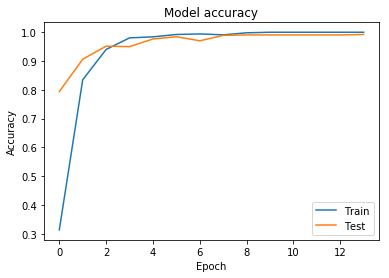

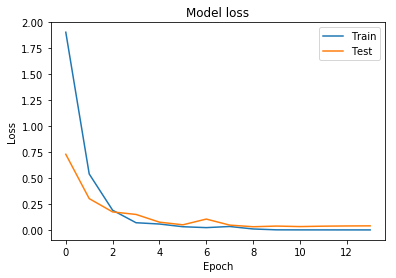

In [21]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()